In [1]:
# !pip install -U protobuf
# !pip install -U tensorflow==2.17.1 (or just !pip install -U tensorflow (in order to avoid numerous warnings))

# !wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip
# !unzip data.zip

In [2]:
import numpy as np
import tensorflow as tf
import seaborn as sns

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.preprocessing.image import ImageDataGenerator

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

tf.__version__

2024-12-02 22:54:22.122499: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 22:54:22.138435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-02 22:54:22.157938: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-02 22:54:22.163871: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 22:54:22.177942: I tensorflow/core/platform/cpu_feature_guar

'2.17.1'

### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be (200, 200, 3)
* Next, create a convolutional layer (Conv2D):
    * Use 32 filters
    * Kernel size should be (3, 3) (that's the size of the filter)
    * Use 'relu' as activation
* Reduce the size of the feature map with max pooling (MaxPooling2D)
    * Set the pooling size to (2, 2)
* Turn the multi-dimensional result into vectors using a Flatten layer
* Next, add a Dense layer with 64 neurons and 'relu' activation
* Finally, create the Dense layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use SGD with the following parameters:
* `SGD(lr=0.002, momentum=0.8)`


In [3]:
model = Sequential([
    Input(shape=(200, 200, 3)),
    Conv2D(filters=32, 
           kernel_size=(3, 3), 
           activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
model.compile(optimizer=optimizer, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

I0000 00:00:1733180064.832910    6360 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733180064.889618    6360 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733180064.889881    6360 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733180064.890773    6360 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

<i>Binary Crossentropy</i>

### Question 2
What's the total number of parameters of the model? You can use the summary method for that.

<i>Total params: 20,073,473 </i>

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

`ImageDataGenerator(rescale=1./255)`

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the class_mode parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets.

For training use `.fit()` with the following params:

`model.fit(train_generator, epochs=10, validation_data=test_generator)`

In [4]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './data/train/',
    target_size=(200, 200),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

print('Classes:', train_ds.class_indices)

# X, y = next(train_ds)

Found 802 images belonging to 2 classes.
Classes: {'curly': 0, 'straight': 1}


In [5]:
test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    './data/test/',
    target_size=(200, 200),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

print('Classes:', test_ds.class_indices)

# X, y = next(test_ds)

Found 201 images belonging to 2 classes.
Classes: {'curly': 0, 'straight': 1}


In [6]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds,
    verbose=1
)

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1733180066.990715    6396 service.cc:146] XLA service 0x7f57b0008120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733180066.990756    6396 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-02 22:54:27.027427: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-02 22:54:27.138570: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 3/41 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5111 - loss: 0.6952

I0000 00:00:1733180068.458629    6396 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 0.5207 - loss: 0.7469 - val_accuracy: 0.5174 - val_loss: 0.6920
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.5684 - loss: 0.6871 - val_accuracy: 0.6517 - val_loss: 0.6684
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.6942 - loss: 0.6406 - val_accuracy: 0.6716 - val_loss: 0.6183
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.7209 - loss: 0.5647 - val_accuracy: 0.7015 - val_loss: 0.5945
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.7370 - loss: 0.5262 - val_accuracy: 0.6716 - val_loss: 0.5764
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.7319 - loss: 0.5123 - val_accuracy: 0.6915 - val_loss: 0.5672
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.7575 - loss: 0.5198 - val_accuracy: 0.6866 - val_loss: 0.5572
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.7665 - loss: 0.4725 - val_accuracy: 0.6816 - val

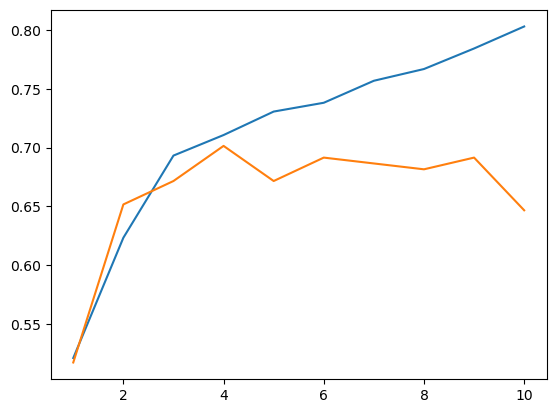

In [7]:
epoch = [i for i in range(1, 11)]
plt.plot(epoch, history.history['accuracy'], label='train')
plt.plot(epoch, history.history['val_accuracy'], label='test')
plt.show()

### Question 3
What is the median of training accuracy for all the epochs for this model?

In [8]:
round(np.median(history.history['accuracy']),3)

0.734

### Question 4
What is the standard deviation of training loss for all the epochs for this model?

In [9]:
round(np.std(history.history['loss']),3)

0.096

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`


In [10]:
train_gen_aug = ImageDataGenerator(rescale=1./255,
                               rotation_range=50,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')


train_ds_aug = train_gen_aug.flow_from_directory(
    './data/train/',
    target_size=(200, 200),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)
print('Train classes:', train_ds_aug.class_indices, '\n')


test_gen_aug = ImageDataGenerator(rescale=1./255,
                               rotation_range=50,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

test_ds_aug = test_gen_aug.flow_from_directory(
    './data/test/',
    target_size=(200, 200),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

print('Test classes: ', test_ds_aug.class_indices)

Found 802 images belonging to 2 classes.
Train classes: {'curly': 0, 'straight': 1} 

Found 201 images belonging to 2 classes.
Test classes:  {'curly': 0, 'straight': 1}


In [11]:
history2 = model.fit(
    train_ds_aug,
    epochs=10,
    validation_data=test_ds_aug,
    verbose=1
)

history2

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 299ms/step - accuracy: 0.6846 - loss: 0.6115 - val_accuracy: 0.7164 - val_loss: 0.5847
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 285ms/step - accuracy: 0.6787 - loss: 0.5774 - val_accuracy: 0.7363 - val_loss: 0.5534
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 281ms/step - accuracy: 0.7378 - loss: 0.5407 - val_accuracy: 0.6766 - val_loss: 0.5942
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 289ms/step - accuracy: 0.7031 - loss: 0.5770 - val_accuracy: 0.7264 - val_loss: 0.5886
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 292ms/step - accuracy: 0.6881 - loss: 0.5936 - val_accuracy: 0.6269 - val_loss: 0.6804
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 284ms/step - accuracy: 0.7289 - loss: 0.5510 - val_accuracy: 0.7214 - val_loss: 0.5849
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 287ms/step - accuracy: 0.7546 - loss: 0.5102 - val_accuracy: 0.7114 - val_loss: 0.5735
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 285ms/step - accuracy: 0.7356 - loss: 0.5214 - val_accu

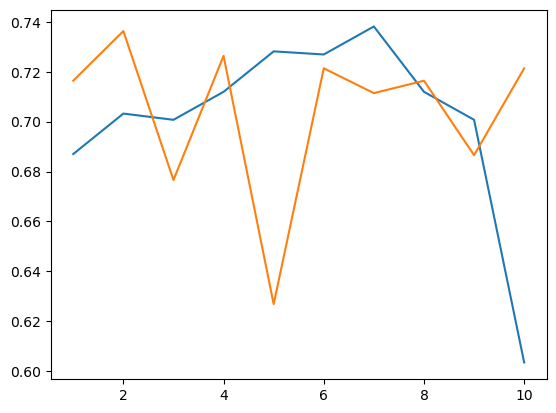

In [12]:
epoch = [i for i in range(1, 11)]
plt.plot(epoch, history2.history['accuracy'], label='train')
plt.plot(epoch, history2.history['val_accuracy'], label='test')
plt.show()

### Question 5

Let's train our model for 10 more epochs using the same code as previously.

<b>Note: make sure you don't re-create the model - we want to continue training the model we already started training.</b>

What is the mean of test loss for all the epochs for the model trained with augmentations?

In [13]:
round(np.mean(history2.history['val_loss']),3)

0.593

### Question 6
What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [14]:
round(np.mean(history2.history['val_accuracy'][5:]),3)

0.711